# Locally Linear Embedding (LLE) algorithm for Metric data

In [48]:
# Locally Linear Embedding (LLE) algorithm 
# https://redwood.berkeley.edu/wp-content/uploads/2018/06/chen2018sparse.pdf
# [48] Sam T Roweis and Lawrence K Saul. Nonlinear dimensionality reduction by locally linearembedding.science, 290(5500):2323–2326, 2000.

In [50]:

using JSON
using Glob
using Dates
using Plots
using ProgressMeter
using DataFrames
using CSV
using StatsBase


include("../src/manifoldLearning.jl")
include("../src/encoding.jl")


encodeData2SparseMat (generic function with 1 method)

### Generate Data

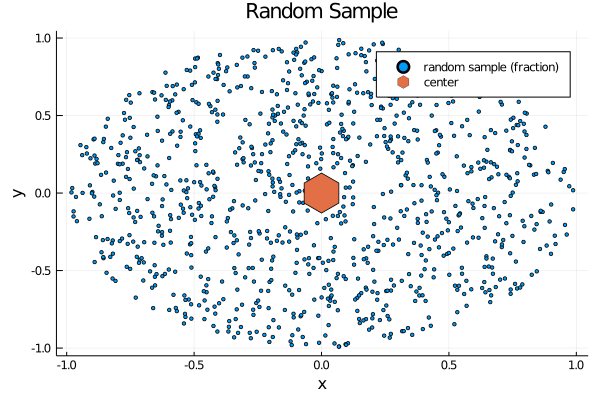

In [52]:

struct Data2D
    
    x::Float64
    y::Float64
    
end

dist2D(pt1::Data2D, pt2::Data2D) = (pt1.x-pt2.x)^2 + (pt1.y-pt2.y)^2


nData = 5000000
data = [Data2D(0., 0.)]
while length(data) < nData
    x, y = 2*rand()-1, 2*rand()-1
    if x^2 + y^2 < 1.
        push!(data, Data2D(x, y))
    end
end


scatter(map(d -> d.x, data[1:1000]),
        map(d -> d.y, data[1:1000]),
        label="random sample (fraction)", marker=(:circle,2,1.))


scatter!([data[1].x], [data[1].y],
         label="center", marker=(:hexagon, 20, 1.), 
         xlabel = "x", ylabel="y", title="Random Sample")


### Data to Encode

In [53]:

data2Encode = Data2D[]

while length(data2Encode) < 1000
    
    x, y = 2*rand()-1, 2*rand()-1
    
    if x^2 + y^2 < 1.
        push!(data2Encode, Data2D(x, y))
    end
    
end


In [54]:

localembedder = LocallyLinearEmbedding(10000,4,data);


### encode Indices

In [57]:

encoderModel = Dict(:N => 10000, :W => 10)

encoder = dicData -> encodeData2Idces(dicData, localembedder, 10, dist2D)

encoder(data2Encode[1]);


### Encode data into HD vector and matrices

In [60]:

hdVec = encodeData2SparseVec(data2Encode[1], encoder, encoderModel)

hdMat = encodeData2SparseMat(data2Encode[1:100], encoder, encoderModel);


Progress: 100%|█████████████████████████████████████████| Time: 0:03:57
